## Exercise - week 3

### Exercise 1 - classes

1. Create 3 classes: Student, DataSheet and Course
2. A student has a data_sheet and a data_sheet has multiple courses in particular order
3. Each course has name, classroom, teacher, ETCS and optional grade if course is taken.
4. In Student create init() so that a Student can be initiated with name, gender, data_sheet and image_url
5. In DataSheet create a method to get_grades_as_list()
6. In student create a method: get_avg_grade()


In [72]:
class Course():
    def __init__(self, name, classroom, teacher, ECTS, grade = None):
        self.name = name
        self.classroom = classroom
        self.teacher = teacher
        self.ECTS = ECTS
        self.grade = grade
    
class Data_sheed():
    def __init__(self, courses = []):
        self.courses = courses
        
    def add_course(self, course):
        self.courses.append(course)
        
    def get_grades_as_list(self):
        grades = []
        for course in self.courses:
            grades.append(course.grade)
        return grades
    
class Student():
    def __init__(self, name, gender, data_sheed, image_url):
        self.data_sheed = data_sheed
        self.name = name
        self.gender = gender
        self.image_url = image_url
    
    def get_avg_grade(self):
        grades = self.data_sheed.get_grades_as_list()
        return sum(grades) / len(grades)
    
    """9. Make a method on Student class that can show progression of 
    the study in % (add up ECTS from all passed courses divided by total
    of 150 total points (equivalent to 5 semesters))"""
    
    def show_progress(self):
        total_ects = 0
        for course in self.data_sheed.courses:
            if(course.grade != None):
                total_ects += course.ECTS
        return total_ects/150
    

7. Create a function that can generate n number of students with random: name, gender, courses (from a fixed list of course names), grades, img_url

    A. Let the function write the result to a csv file with format stud_name, course_name, teacher, ects, classroom, grade, img_url

In [73]:
import random
import csv

course1 = Course("Programming", "1.03", "Tue",30, 12)
course2 = Course("System Development", "2.06", "Palle",15,10)
course3 = Course("Python", "1.03", "Thomas",15,7)

def generate_students(number_of_students):
    course_names=['Programming','System Development','Python','Security','Fullstack Javascript']
    classrooms=['1.03','2.05','2.64','3.01']
    teachers=['Tue','Tobias','Jon','Thomas','Tine']
    ECTS=[15,10,30,5]
    grades=[0,2,4,7,10,12]
    
    names=['Amanda','Amalie','Benjamin','Laura','Dominik','Jonas','Dylan','Andrea','Harald','Hyben']
    gender=['Female','Male','Transgender','Agender','Bigender','Polygender']
    images=["http://lava360.com/wp-content/uploads/2016/04/Spot-on-funny-caricatures-from-photos1.0.jpg", "https://i.ytimg.com/vi/lBosbEgC_5o/hqdefault.jpg", "http://www.kgsartwear.com/wp-content/uploads/2013/07/upperlip.jpg", "https://www.askideas.com/media/14/Angry-Face-Funny-Woman-Image.jpg", "http://3.bp.blogspot.com/-uoHXkY0ttDU/T98R1DYew9I/AAAAAAAAG5E/15Qb-05Wh1I/s1600/funny+face+expressions+%2819%29.jpg", "https://www.askideas.com/media/50/Funny-Jim-Carrey-Smiling-Face-Picture.jpg", "http://4.bp.blogspot.com/-NciOIYoZS6I/T98R7LJymiI/AAAAAAAAG5U/ZVRFD25RxD8/s1600/funny+face+expressions+%2820%29.jpg"]
    
    students = []
    for x in range(number_of_students):
        courses = []
        for x in range(random.randint(2,4)):
            course = Course(random.choice(course_names),random.choice(classrooms),random.choice(teachers),random.choice(ECTS),random.choice(grades))
            courses.append(course)
        
        data_sheed = Data_sheed(courses)
        student = Student(random.choice(names),random.choice(gender),data_sheed,random.choice(images))
        students.append(student)
    
    with open('students.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(["stud_name", "gender", "course_name", "teacher", "ects", "classroom", "grade", "img_url"])
        for student in students:
            for course in student.data_sheed.courses:
                writer.writerow([student.name, student.gender, course.name, course.teacher, course.ECTS, 
                                    course.classroom, course.grade, student.image_url])

generate_students(4)

8. Read student data into a list of Students from a csv file:

    A. loop through the list and print each student with name, img_url and avg_grade.
    
    B. sort the list by avg_grade

In [74]:
import csv

with open('students.csv') as file:
    reader = csv.reader(file)
    next(reader)
    students = []
    
    for row in reader:
        name, gender, course_name, teacher, ects, classroom, grade, url = row
        course = Course( course_name, classroom, teacher, ects, int(grade))
        data_sheed = Data_sheed([course])
        student = Student(name, gender, data_sheed, url)
        
        if(len(students) == 0):
            students.append(student)
            
        elif(student.name == students[-1].name and student.gender == students[-1].gender):
            students[-1].data_sheed.add_course(course)
        else:
            students.append(student)
            
    sort_students = sorted(students, key=Student.get_avg_grade)
    for student in sort_students:
        
        print(student.name, student.image_url, student.get_avg_grade())

Benjamin http://3.bp.blogspot.com/-uoHXkY0ttDU/T98R1DYew9I/AAAAAAAAG5E/15Qb-05Wh1I/s1600/funny+face+expressions+%2819%29.jpg 3.75
Hyben http://lava360.com/wp-content/uploads/2016/04/Spot-on-funny-caricatures-from-photos1.0.jpg 4.0
Laura http://lava360.com/wp-content/uploads/2016/04/Spot-on-funny-caricatures-from-photos1.0.jpg 5.333333333333333
Dominik http://4.bp.blogspot.com/-NciOIYoZS6I/T98R7LJymiI/AAAAAAAAG5U/ZVRFD25RxD8/s1600/funny+face+expressions+%2820%29.jpg 12.0


  C. create a bar chart with student_name on x and avg_grade on y-axis

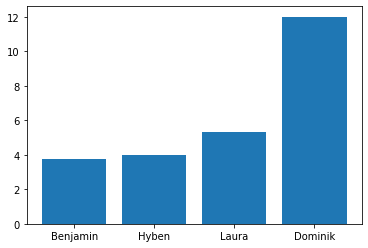

In [75]:
import matplotlib.pyplot as plt

names = [student.name for student in sort_students]
grades = [student.get_avg_grade() for student in sort_students]

plt.bar(names,grades)
plt.show()

10. Show a bar chart of distribution of study progression on x-axis and number of students in each category on y-axis. (e.g. make 10 categories from 0-100%)

I didn't understand this exercise


### Exercise 2 - exceptions

1. Create a function that can take a list of students and return the 3 students closest to completing their study.